UTS Model Deployment
Carrissa Gloria Herman
2702322411
Dataset A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

## EDA Data

Load dataset

In [3]:
df = pd.read_csv("Dataset_A_loan.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.shape

(45000, 14)

In [5]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("")

Streaming output truncated to the last 5000 lines.
4252.0        1
11651.0       1
7665.0        1
7362.0        1
13725.0       1
9942.0        1
29274.0       1
2697.0        1
5569.0        1
18330.0       1
10495.0       1
7769.0        1
11869.0       1
14814.0       1
2106.0        1
1665.0        1
7717.0        1
10886.0       1
1983.0        1
15206.0       1
7259.0        1
17808.0       1
24191.0       1
8235.0        1
8941.0        1
21067.0       1
11932.0       1
19477.0       1
6395.0        1
2041.0        1
6580.0        1
3907.0        1
1046.0        1
12716.0       1
1855.0        1
22539.0       1
2531.0        1
11631.0       1
5682.0        1
1568.0        1
4744.0        1
3628.0        1
1171.0        1
1993.0        1
9345.0        1
7262.0        1
1052.0        1
11888.0       1
24083.0       1
13382.0       1
4821.0        1
5686.0        1
5003.0        1
8091.0        1
1639.0        1
7688.0        1
12965.0       1
24380.0       1
8212.0        1
11432

Hal yang perlu diperbaiki:  
Menyamakan penulisan gender "male", "female", "Male", dan "fe male"

In [8]:
df['person_gender'].value_counts()

,count
person_gender,
male,24799
female,20111
Male,45
fe male,45


In [9]:
df['person_gender'] = df['person_gender'].replace({'Male':'male', 'fe male': 'female'})
df['person_gender'].value_counts()

,count
person_gender,
male,24844
female,20156


## Dataset Splitting  

In [10]:
from sklearn.model_selection import train_test_split

x = df.drop('loan_status', axis=1).copy()
y = df['loan_status'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=88, shuffle=True)

## Missing Values

In [11]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,2250
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Sebelum impute missing value pada column 'person_income', kita perlu melakukan outlier detection untuk mengetahui cara terbaik untuk melakukan impute missing value dan memperbaiki value-value yang tidak masuk akal.

<Axes: >

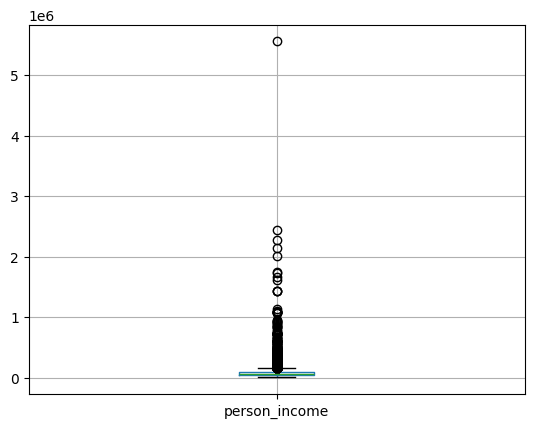

In [12]:
x_train.boxplot('person_income')

Buat function untuk mendeteksi outlier berdasarkan peraturan IQR

In [13]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    IQR = q3-q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    for i in data:
        if (i < lower_bound or i > upper_bound):
            outliers.append(i)
    return outliers

income_outlier = detect_outliers_iqr(x_train['person_income'])
print("Outliers di column 'person_income:", income_outlier)
print("Jumlah outliers di column 'person_income:", len(income_outlier))

Outliers di column 'person_income: [270972.0, 171265.0, 183548.0, 205046.0, 211005.0, 356880.0, 177269.0, 199596.0, 216897.0, 301158.0, 420652.0, 493048.0, 173294.0, 180646.0, 180875.0, 192674.0, 207525.0, 207697.0, 216923.0, 241075.0, 180643.0, 611327.0, 204962.0, 210914.0, 180752.0, 241153.0, 301151.0, 422975.0, 193097.0, 228303.0, 289054.0, 180670.0, 322597.0, 178601.0, 209393.0, 291800.0, 360959.0, 240642.0, 180868.0, 276922.0, 198957.0, 179877.0, 181221.0, 241041.0, 203531.0, 211022.0, 253004.0, 577186.0, 169439.0, 181014.0, 181110.0, 231450.0, 169438.0, 241966.0, 270797.0, 180986.0, 193014.0, 193168.0, 270875.0, 173345.0, 217215.0, 286397.0, 168827.0, 169315.0, 170578.0, 181214.0, 181353.0, 210555.0, 226751.0, 217115.0, 223194.0, 186971.0, 202682.0, 240810.0, 241092.0, 725242.0, 187709.0, 193124.0, 238837.0, 175387.0, 168935.0, 180846.0, 194828.0, 271193.0, 184645.0, 361181.0, 363682.0, 185905.0, 213645.0, 226664.0, 293525.0, 174825.0, 182130.0, 188387.0, 209988.0, 228907.0, 2707

In [14]:
pd.set_option('display.float_format', '{:.0f}'.format)
x_train['person_income'].describe()

,person_income
count,34181
mean,80112
std,71186
min,8000
25%,47087
50%,67002
75%,95698
max,5556399


In [15]:
print('Min outlier:', pd.DataFrame(income_outlier).min()[0])
print('Max outlier:', pd.DataFrame(income_outlier).max()[0])
print('Mean outlier:', pd.DataFrame(income_outlier).mean()[0])

Min outlier: 168633.0
Max outlier: 5556399.0
Mean outlier: 259862.46978672987


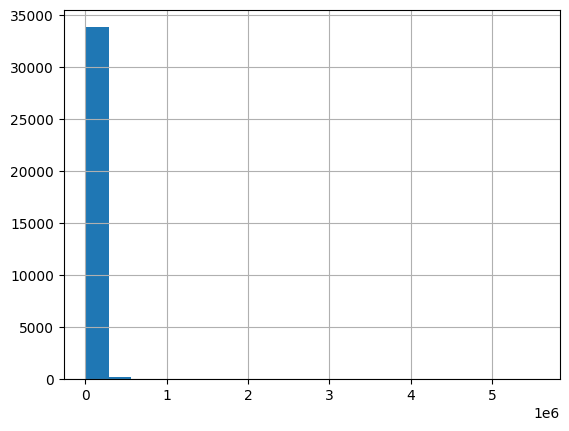

In [16]:
x_train['person_income'].hist(bins=20)
plt.show()

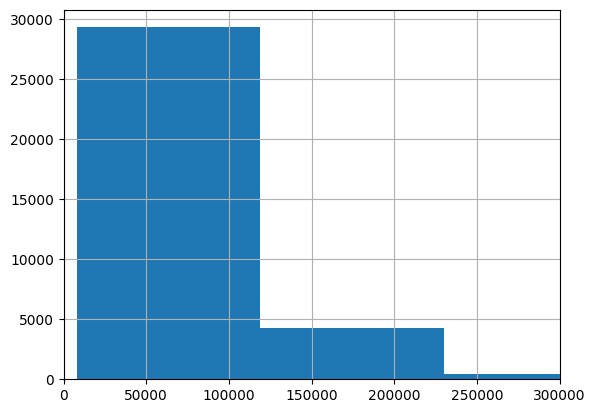

In [17]:
x_train['person_income'].hist(bins=50)
plt.xlim(0, 300000)
plt.show()

Kita bisa melihat bahwa nilai min max, dan mean outlier jauh lebih besar daripada nilai min, max, dan mean dataset seluruhnya. Oleh karena itu, kita bisa menganggap bahwa nilai-nilai yang terdapat pada list outlier berupa true outlier dan harus di handle terlebih dahulu. Selain itu, lewat histogram, kita bisa melihat bahwa data 'person_income' sangat skewed dan jumlah outliernya sangat banyak (2112). Maka, outlier akan di-impute dengan nilai median dari training dataset.

In [18]:
income_median = x_train['person_income'].median()
income_median

67002.0

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [19]:
def lower_upper(data):
  q1 = np.nanpercentile(data, 25)
  q3 = np.nanpercentile(data, 75)
  IQR = q3-q1
  lower_bound = q1-(1.5*IQR)
  upper_bound = q3+(1.5*IQR)
  return lower_bound, upper_bound

In [20]:
income_lower_bound, income_upper_bound = lower_upper(x_train['person_income'])
print(income_lower_bound)
print(income_upper_bound)

-25829.5
168614.5


Impute outlier pada semua dataset dengan median dari training dataset (income_median)

In [21]:
def impute_outlier(data, lower_bound, upper_bound, median):
  for i in data:
    if (i < lower_bound or i > upper_bound):
      data = data.replace(i, median)
  return data

x_train['person_income'] = impute_outlier(x_train['person_income'], income_lower_bound, income_upper_bound, income_median)
x_test['person_income'] = impute_outlier(x_test['person_income'], income_lower_bound, income_upper_bound, income_median)

In [22]:
x_train['person_income'].describe()

,person_income
count,34181
mean,70588
std,31562
min,8000
25%,47087
50%,67002
75%,88433
max,168591


In [23]:
x_test['person_income'].describe()

,person_income
count,8569
mean,71087
std,31926
min,8000
25%,47850
50%,67002
75%,89438
max,167935


Missing value handling untuk column 'person_income'. In

<Axes: >

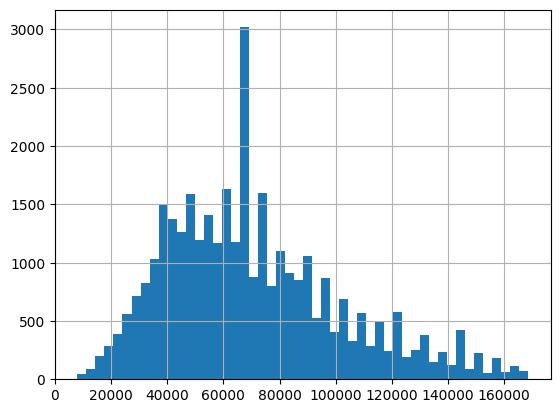

In [24]:
x_train['person_income'].hist(bins=50)

Karena dataset setelah handling outlier pun masih skewed, maka kita akan impute missing value dengan median.

In [25]:
new_income_median = x_train['person_income'].median()
x_train['person_income'] = x_train['person_income'].fillna(new_income_median)
x_test['person_income'] = x_test['person_income'].fillna(new_income_median)

In [26]:
x_train.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [27]:
x_test.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [28]:
y_train.isna().sum()

np.int64(0)

In [29]:
y_test.isna().sum()

np.int64(0)

## Outlier Detection

Kita perlu melakukan outlier detection terhadap column/variabel numerical lain yang belum di testing. Categorical variabel tidak perlu dilakukan outlier detection karena outlier detection dilakukan saat value_counts di awal notebook.

List numerical variabel:  
1. person_age
2. person_emp_exp
3. loan_amnt
4. loan_int_rate
5. loan_percent_income
6. cb_person_cred_hist_length
7. credit_score

In [30]:
pd.reset_option('display.float_format')

<Axes: >

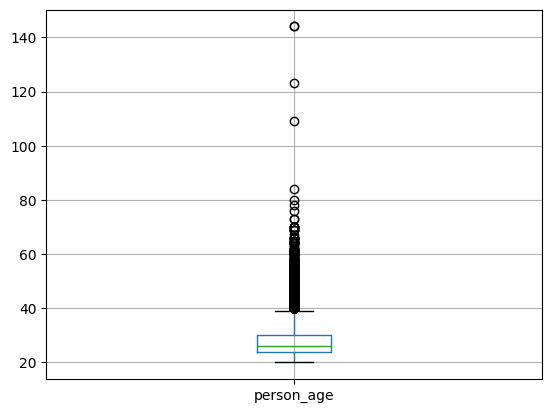

In [31]:
x_train.boxplot('person_age')

<Axes: >

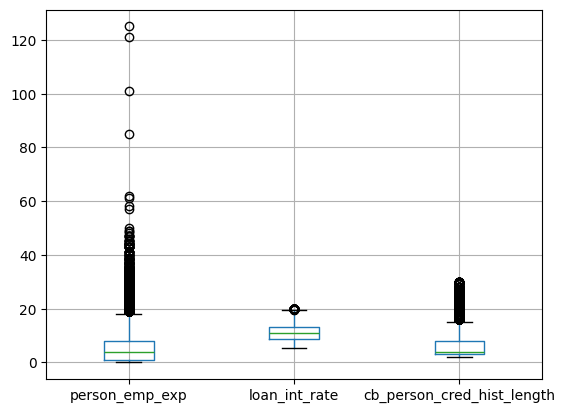

In [32]:
x_train.boxplot(['person_emp_exp', 'loan_int_rate', 'cb_person_cred_hist_length'])

<Axes: >

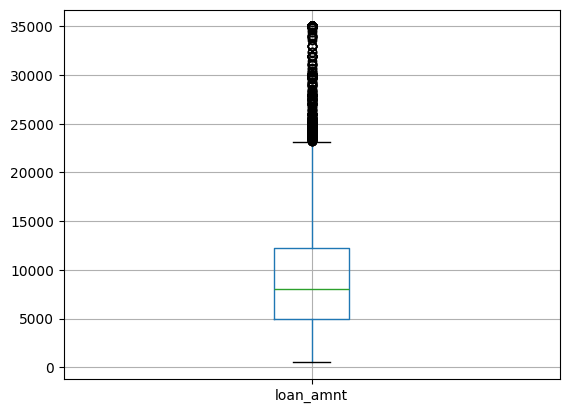

In [33]:
x_train.boxplot('loan_amnt')

<Axes: >

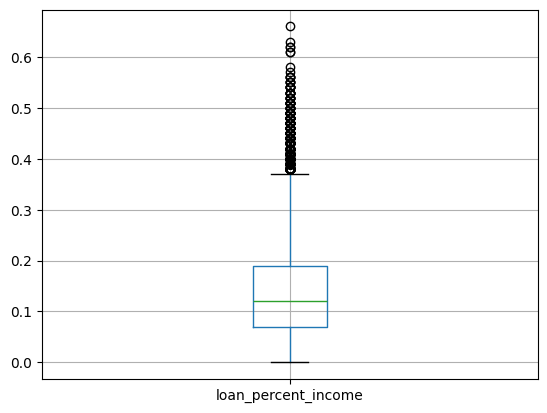

In [34]:
x_train.boxplot('loan_percent_income')

<Axes: >

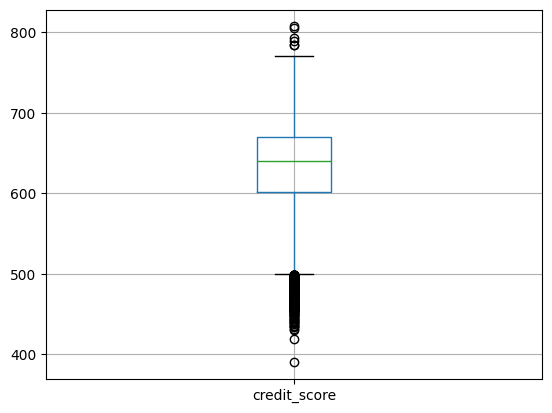

In [35]:
x_train.boxplot('credit_score')

Semua numerical variable memiliki banyak outlier yang perlu di handle

### person_age

In [36]:
age_outlier = detect_outliers_iqr(x_train['person_age'])
print("Outliers di column 'person_age:", age_outlier)
print("Jumlah outliers di column 'person_age:", len(age_outlier))

Outliers di column 'person_age: [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 4

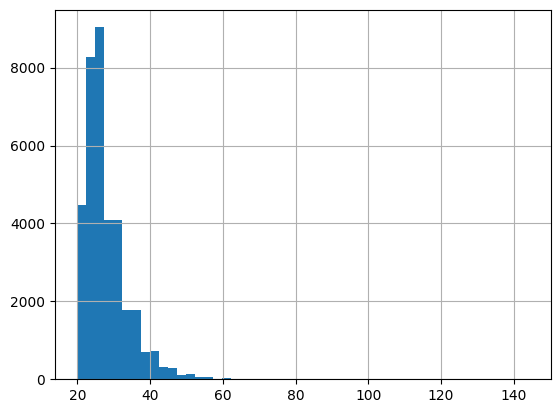

In [37]:
x_train['person_age'].hist(bins=50)
plt.show()

Karena data distributionnya skewed, kita impute outlier dengan median.

In [38]:
age_median = x_train['person_age'].median()
age_median

26.0

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [39]:
age_lower_bound, age_upper_bound = lower_upper(x_train['person_age'])
print(age_lower_bound)
print(age_upper_bound)

15.0
39.0


Impute outlier pada semua dataset dengan median dari training dataset

In [40]:
x_train['person_age'] = impute_outlier(x_train['person_age'], age_lower_bound, age_upper_bound, age_median)
x_test['person_age'] = impute_outlier(x_test['person_age'], age_lower_bound, age_upper_bound, age_median)

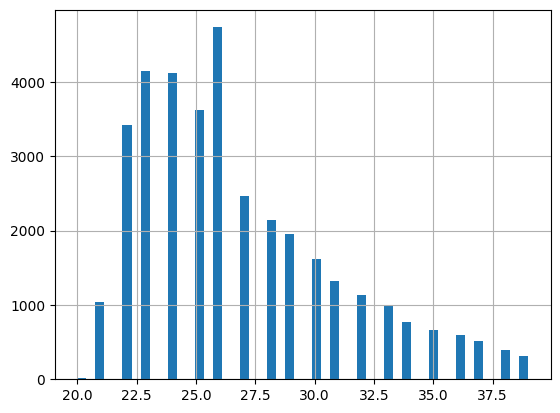

In [41]:
x_train['person_age'].hist(bins=50)
plt.show()

### person_emp_exp

In [42]:
emp_exp_outlier = detect_outliers_iqr(x_train['person_emp_exp'])
print("Outliers di column 'person_emp_exp:", emp_exp_outlier)
print("Jumlah outliers di column 'person_emp_exp:", len(emp_exp_outlier))

Outliers di column 'person_emp_exp: [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,

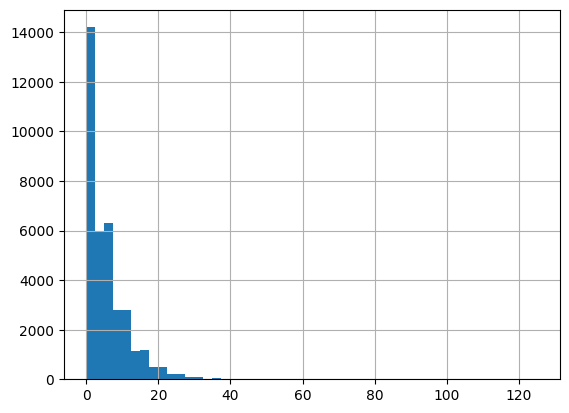

In [43]:
x_train['person_emp_exp'].hist(bins=50)
plt.show()

Karena data distributionnya skewed, kita impute outlier dengan median.

In [44]:
emp_exp_median = x_train['person_emp_exp'].median()
emp_exp_median

4.0

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [45]:
emp_exp_lower_bound, emp_exp_upper_bound = lower_upper(x_train['person_emp_exp'])
print(emp_exp_lower_bound)
print(emp_exp_upper_bound)

-9.5
18.5


Impute outlier pada semua dataset dengan median dari training dataset

In [46]:
x_train['person_emp_exp'] = impute_outlier(x_train['person_emp_exp'], emp_exp_lower_bound, emp_exp_upper_bound, emp_exp_median)
x_test['person_emp_exp'] = impute_outlier(x_test['person_emp_exp'], emp_exp_lower_bound, emp_exp_upper_bound, emp_exp_median)

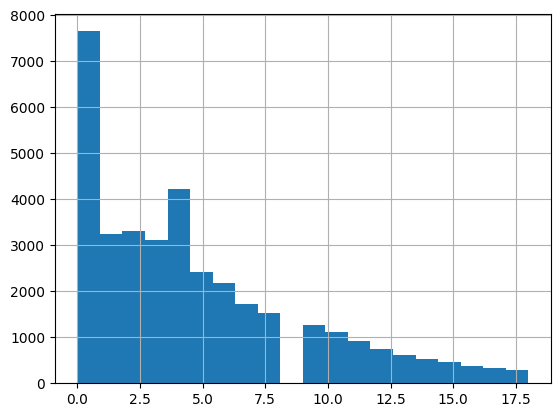

In [47]:
x_train['person_emp_exp'].hist(bins=20)
plt.show()

### loan_amnt

In [48]:
amnt_outlier = detect_outliers_iqr(x_train['loan_amnt'])
print("Outliers di column 'loan_amnt:", amnt_outlier)
print("Jumlah outliers di column 'loan_amnt:", len(amnt_outlier))

Outliers di column 'loan_amnt: [23200.0, 23200.0, 23200.0, 23225.0, 23325.0, 23325.0, 23400.0, 23450.0, 23450.0, 23450.0, 23462.0, 23487.0, 23500.0, 23500.0, 23500.0, 23500.0, 23500.0, 23500.0, 23500.0, 23500.0, 23500.0, 23500.0, 23500.0, 23525.0, 23558.0, 23575.0, 23600.0, 23600.0, 23600.0, 23638.0, 23663.0, 23666.0, 23687.0, 23700.0, 23700.0, 23737.0, 23737.0, 23748.0, 23750.0, 23774.0, 23776.0, 23786.0, 23800.0, 23800.0, 23800.0, 23800.0, 23802.0, 23821.0, 23839.0, 23857.0, 23873.0, 23890.0, 23915.0, 23925.0, 23928.0, 23929.0, 23942.0, 23949.0, 23953.0, 23963.0, 23970.0, 23975.0, 23975.0, 23982.0, 23987.0, 23989.0, 23990.0, 23990.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000.0, 24000

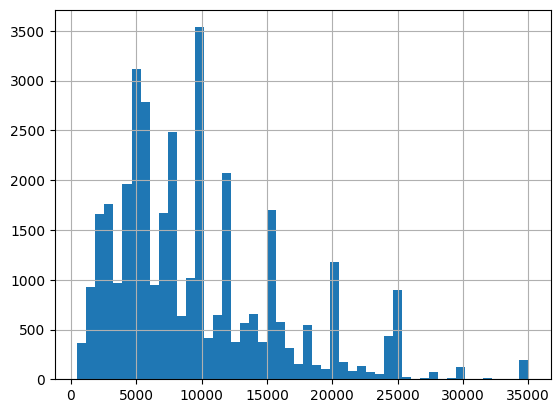

In [49]:
x_train['loan_amnt'].hist(bins=50)
plt.show()

Karena data distributionnya skewed, kita impute outlier dengan median.

In [50]:
amnt_median = x_train['loan_amnt'].median()
amnt_median

8000.0

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [51]:
amnt_lower_bound, amnt_upper_bound = lower_upper(x_train['loan_amnt'])
print(amnt_lower_bound)
print(amnt_upper_bound)

-5875.0
23125.0


Impute outlier pada semua dataset dengan median dari training dataset

In [52]:
x_train['loan_amnt'] = impute_outlier(x_train['loan_amnt'], amnt_lower_bound, amnt_upper_bound, amnt_median)
x_test['loan_amnt'] = impute_outlier(x_test['loan_amnt'], amnt_lower_bound, amnt_upper_bound, amnt_median)

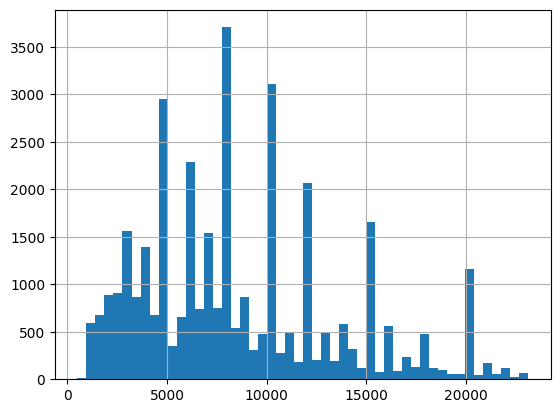

In [53]:
x_train['loan_amnt'].hist(bins=50)
plt.show()

### loan_int_rate

In [54]:
int_rate_outlier = detect_outliers_iqr(x_train['loan_int_rate'])
print("Outliers di column 'loan_int_rate:", int_rate_outlier)
print("Jumlah outliers di column 'loan_int_rate:", len(int_rate_outlier))

Outliers di column 'loan_int_rate: [19.62, 19.69, 19.69, 19.69, 19.69, 19.69, 19.69, 19.69, 19.69, 19.69, 19.69, 19.69, 19.74, 19.74, 19.74, 19.79, 19.79, 19.8, 19.82, 19.82, 19.82, 19.82, 19.91, 19.91, 19.91, 19.91, 19.91, 19.91, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]
Jumlah outliers di column 'loan_int_rate: 94


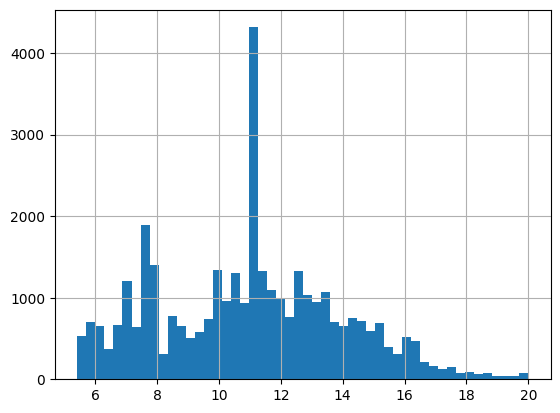

In [55]:
x_train['loan_int_rate'].hist(bins=50)
plt.show()

Karena data distributionnya skewed, kita impute outlier dengan median.

In [56]:
int_rate_median = x_train['loan_int_rate'].median()
int_rate_median

11.01

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [57]:
int_rate_lower_bound, int_rate_upper_bound = lower_upper(x_train['loan_int_rate'])
print(int_rate_lower_bound)
print(int_rate_upper_bound)

1.9899999999999993
19.59


Impute outlier pada semua dataset dengan median dari training dataset

In [58]:
x_train['loan_int_rate'] = impute_outlier(x_train['loan_int_rate'], int_rate_lower_bound, int_rate_upper_bound, int_rate_median)
x_test['loan_int_rate'] = impute_outlier(x_test['loan_int_rate'], int_rate_lower_bound, int_rate_upper_bound, int_rate_median)

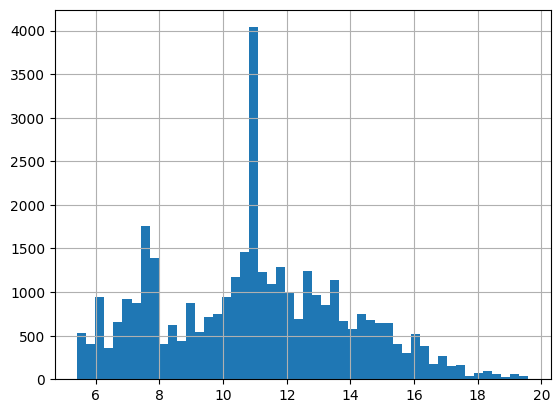

In [59]:
x_train['loan_int_rate'].hist(bins=50)
plt.show()

### loan_percent_income

In [60]:
loan_percent_outlier = detect_outliers_iqr(x_train['loan_percent_income'])
print("Outliers di column 'loan_percent_income:", loan_percent_outlier)
print("Jumlah outliers di column 'loan_percent_income:", len(loan_percent_outlier))

Outliers di column 'loan_percent_income: [0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39

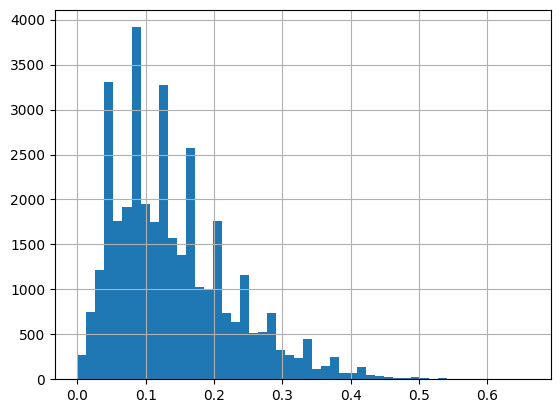

In [61]:
x_train['loan_percent_income'].hist(bins=50)
plt.show()

Karena data distributionnya skewed, kita impute outlier dengan median.

In [62]:
loan_percent_median = x_train['loan_percent_income'].median()
loan_percent_median

0.12

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [63]:
loan_percent_lower_bound, loan_percent_upper_bound = lower_upper(x_train['loan_percent_income'])
print(loan_percent_lower_bound)
print(loan_percent_upper_bound)

-0.10999999999999999
0.37


Impute outlier pada semua dataset dengan median dari training dataset

In [64]:
x_train['loan_percent_income'] = impute_outlier(x_train['loan_percent_income'], loan_percent_lower_bound, loan_percent_upper_bound, loan_percent_median)
x_test['loan_percent_income'] = impute_outlier(x_test['loan_percent_income'], loan_percent_lower_bound, loan_percent_upper_bound, loan_percent_median)

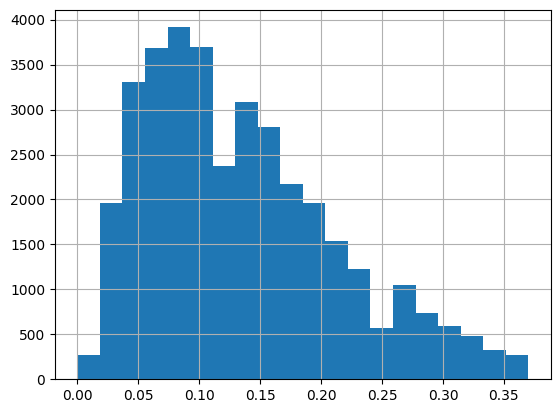

In [65]:
x_train['loan_percent_income'].hist(bins=20)
plt.show()

### cb_person_cred_hist_length

In [66]:
cred_hist_outlier = detect_outliers_iqr(x_train['cb_person_cred_hist_length'])
print("Outliers di column 'cb_person_cred_hist_length:", cred_hist_outlier)
print("Jumlah outliers di column 'cb_person_cred_hist_length:", len(cred_hist_outlier))

Outliers di column 'cb_person_cred_hist_length: [16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.

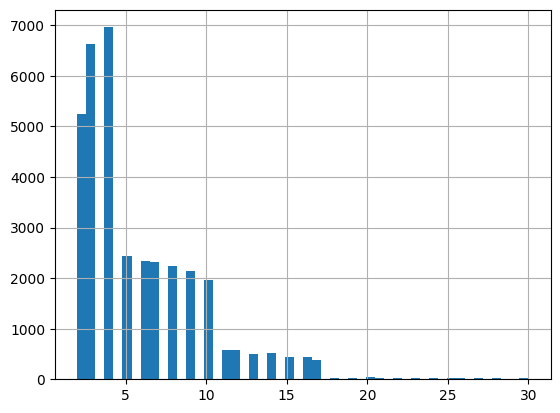

In [67]:
x_train['cb_person_cred_hist_length'].hist(bins=50)
plt.show()

Karena data distributionnya skewed, kita impute outlier dengan median.

In [68]:
cred_hist_median = x_train['cb_person_cred_hist_length'].median()
cred_hist_median

4.0

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [69]:
cred_hist_lower_bound, cred_hist_upper_bound = lower_upper(x_train['cb_person_cred_hist_length'])
print(cred_hist_lower_bound)
print(cred_hist_upper_bound)

-4.5
15.5


Impute outlier pada semua dataset dengan median dari training dataset

In [70]:
x_train['cb_person_cred_hist_length'] = impute_outlier(x_train['cb_person_cred_hist_length'], cred_hist_lower_bound, cred_hist_upper_bound, cred_hist_median)
x_test['cb_person_cred_hist_length'] = impute_outlier(x_test['cb_person_cred_hist_length'], cred_hist_lower_bound, cred_hist_upper_bound, cred_hist_median)

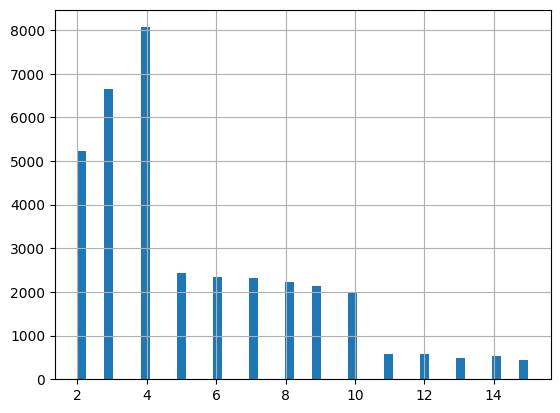

In [71]:
x_train['cb_person_cred_hist_length'].hist(bins=50)
plt.show()

### credit_score

In [72]:
credit_score_outlier = detect_outliers_iqr(x_train['credit_score'])
print("Outliers di column 'credit_score:", credit_score_outlier)
print("Jumlah outliers di column 'credit_score:", len(credit_score_outlier))

Outliers di column 'credit_score: [390, 419, 430, 431, 434, 435, 435, 435, 437, 439, 439, 440, 441, 441, 441, 444, 444, 444, 445, 446, 448, 448, 449, 449, 450, 450, 450, 451, 453, 453, 453, 454, 454, 454, 455, 455, 455, 455, 456, 456, 456, 457, 458, 458, 458, 458, 458, 459, 459, 459, 460, 460, 460, 460, 460, 460, 460, 460, 461, 461, 461, 461, 461, 461, 462, 462, 462, 463, 463, 463, 464, 464, 465, 465, 465, 465, 466, 466, 467, 467, 467, 467, 468, 468, 468, 469, 469, 469, 469, 469, 469, 470, 470, 470, 470, 470, 471, 471, 471, 471, 472, 472, 472, 472, 472, 472, 472, 472, 473, 473, 473, 474, 474, 475, 475, 475, 475, 475, 475, 475, 475, 476, 476, 476, 476, 476, 476, 476, 476, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 478, 478, 478, 478, 478, 478, 479, 479, 479, 479, 479, 479, 479, 479, 480, 480, 480, 480, 480, 480, 480, 480, 480, 481, 481, 481, 481, 481, 481, 482, 482, 482, 482, 482, 483, 483, 483, 483, 483, 483, 483, 483, 484, 484, 484, 484, 484, 

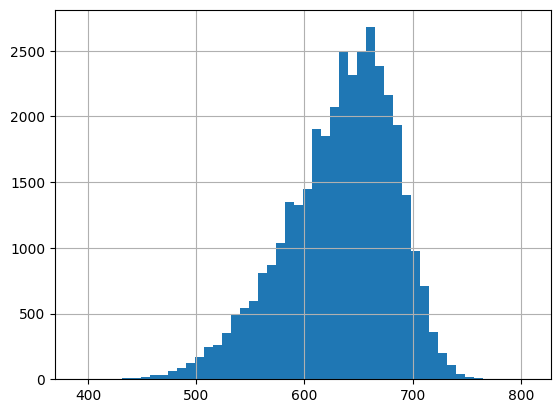

In [73]:
x_train['credit_score'].hist(bins=50)
plt.show()

Karena data distributionnya skewed, kita impute outlier dengan median.

In [74]:
credit_score_median = x_train['credit_score'].median()
credit_score_median

640.0

Cari tahu lower dan upper bound untuk outlier berdasarkan x_train

In [75]:
credit_score_lower_bound, credit_score_upper_bound = lower_upper(x_train['credit_score'])
print(credit_score_lower_bound)
print(credit_score_upper_bound)

500.0
772.0


Impute outlier pada semua dataset dengan median dari training dataset

In [76]:
x_train['credit_score'] = impute_outlier(x_train['credit_score'], credit_score_lower_bound, credit_score_upper_bound, credit_score_median)
x_test['credit_score'] = impute_outlier(x_test['credit_score'], credit_score_lower_bound, credit_score_upper_bound, credit_score_median)

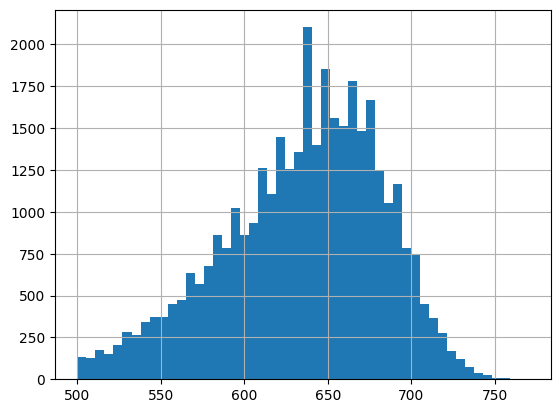

In [77]:
x_train['credit_score'].hist(bins=50)
plt.show()

## Encoding

In [78]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 42205 to 39200
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  object 
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  3

Lakukan encoding pada variabel yang masih memiliki dtype object

In [79]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_hownership = LabelEncoder()
le_intent = LabelEncoder()
le_prev_loan = LabelEncoder()

x_train['person_gender'] = le_gender.fit_transform(x_train['person_gender'])
x_train['person_education'] = le_edu.fit_transform(x_train['person_education'])
x_train['person_home_ownership'] = le_hownership.fit_transform(x_train['person_home_ownership'])
x_train['loan_intent'] = le_intent.fit_transform(x_train['loan_intent'])
x_train['previous_loan_defaults_on_file'] = le_prev_loan.fit_transform(x_train['previous_loan_defaults_on_file'])

x_test['person_gender'] = le_gender.fit_transform(x_test['person_gender'])
x_test['person_education'] = le_edu.fit_transform(x_test['person_education'])
x_test['person_home_ownership'] = le_hownership.fit_transform(x_test['person_home_ownership'])
x_test['loan_intent'] = le_intent.fit_transform(x_test['loan_intent'])
x_test['previous_loan_defaults_on_file'] = le_prev_loan.fit_transform(x_test['previous_loan_defaults_on_file'])

# lihat kembali hasilnya
x_train.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
42205,25.0,1,3,67002.0,1,3,15000.0,0,15.30,0.21,3.0,614,0
42935,23.0,0,3,71677.0,0,3,8000.0,0,17.72,0.33,2.0,629,0
10748,24.0,1,0,48829.0,2,3,10000.0,0,11.99,0.20,3.0,555,1
30883,36.0,1,0,42940.0,15,3,10000.0,5,11.01,0.23,15.0,634,1
33233,30.0,1,1,95344.0,8,3,10000.0,3,10.63,0.10,7.0,659,1


## Scaling

Scaling tidak perlu dilakukan karena model yang ingin dibuat itu random forest dan xgboosting dan keduanya tidak butuh scaled data. Scale data yang berbeda tidak berpengaruh terhadap efisiensi model.

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [5,8,10],
    'max_depth': [3,5,7]
}

In [81]:
Random_forest_class= GridSearchCV(RandomForestClassifier(), param_grid = parameters, scoring= 'accuracy', cv=5)

In [82]:
Random_forest_class.fit(x_train,y_train)
print("Tuned Hyperparameters :", Random_forest_class.best_params_)
print("Accuracy score :",Random_forest_class.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10}
Accuracy score : 0.9116944444444444


In [83]:
Random_forest_class_best = RandomForestClassifier(criterion = 'entropy', max_depth = 7, min_samples_split = 5, random_state = 0)
Random_forest_class_best.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=5,
                       random_state=0)

In [84]:
y_predict_rf = Random_forest_class_best.predict(x_test)

from sklearn.metrics import classification_report

print('\nClassification Report Random Forest Model\n')
print(classification_report(y_test, y_predict_rf))


Classification Report Random Forest Model

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6995
           1       0.91      0.69      0.78      2005

    accuracy                           0.91      9000
   macro avg       0.91      0.83      0.86      9000
weighted avg       0.91      0.91      0.91      9000



## XGBoost

In [85]:
import xgboost as xgb

# set hyperparameters untuk tuning
parameters = {
    'eta': [0.2, 0.3, 0.5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'max_depth': [3,5,7]
}

In [86]:
xgb_class = xgb.XGBClassifier()
grid_xgb_class = GridSearchCV(xgb_class, param_grid = parameters, scoring= 'accuracy', cv=5)

In [87]:
grid_xgb_class.fit(x_train,y_train)
print("Tuned Hyperparameters :", grid_xgb_class.best_params_)
print("Accuracy score :",grid_xgb_class.best_score_)

Tuned Hyperparameters : {'eta': 0.2, 'gamma': 0.1, 'max_depth': 7}
Accuracy score : 0.9284444444444443


In [88]:
xgb_class_best = xgb.XGBClassifier(eta = 0.2, gamma = 0.1, max_depth = 7)
xgb_class_best.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [89]:
y_predict_xgb = xgb_class_best.predict(x_test)

print('\nClassification Report XG Boosting model\n')
print(classification_report(y_test, y_predict_xgb))


Classification Report XG Boosting model

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6995
           1       0.88      0.80      0.84      2005

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



Hasil weighted avg dari XG Boosting model 0.02 lebih baik dari weighted avg dari random forest model dari ketiga kriteria (precision, recall, dan f-1 score). Maka, model yang akan digunakan adalah XG Boosting model dengan parameter:  
eta: 0.2,  
gamma: 0.1,  
max_depth: 7